Problem Statement

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

   Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. 

Attribute Information

1) id : Unique ID for the customer

2) Gender : Gender of the customer

3) Age : Age of the customer

4) Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

5) Region_Code : Unique code for the region of the customer

6) Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7) Vehicle_Age : Age of the Vehicle

8) Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9) Annual_Premium : The amount customer needs to pay as premium in the year

10) PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11) Vintage : Number of Days, Customer has been associated with the company
12) Response : 1 : Customer is interested, 0 : Customer is not interested

 Import Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

In [36]:
import warnings
warnings.filterwarnings('ignore')

 Load Data

In [26]:
df = pd.read_csv('Downloads/Train Health Insurance Cross Sell Prediction.csv')
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1           28                   0   
1   2    Male   76                1            3                   0   
2   3    Male   47                1           28                   0   
3   4    Male   21                1           11                   1   
4   5  Female   29                1           41                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes           40454                    26      217   
1    1-2 Year             No           33536                    26      183   
2   > 2 Years            Yes           38294                    26       27   
3    < 1 Year             No           28619                   152      203   
4    < 1 Year             No           27496                   152       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [3]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of             id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1           28                   0   
1            2    Male   76                1            3                   0   
2            3    Male   47                1           28                   0   
3            4    Male   21                1           11                   1   
4            5  Female   29                1           41                   1   
...        ...     ...  ...              ...          ...                 ...   
381102  381103  Female   25                1           41                   1   
381103  381104    Male   47                1           50                   0   
381104  381105    Male   74                1           26                   1   
381105  381106    Male   30                1           37                   1   
381106  381107    Male   21                1           30                   1

In [5]:
df.describe()

id            Age  Driving_License    Region_Code  \
count  381107.000000  381107.000000    381107.000000  381107.000000   
mean   190554.000000      38.822488         0.997869      26.388833   
std    110016.258857      15.511575         0.046110      13.229907   
min         1.000000      20.000000         0.000000       0.000000   
25%     95277.500000      25.000000         1.000000      15.000000   
50%    190554.000000      36.000000         1.000000      28.000000   
75%    285830.500000      49.000000         1.000000      35.000000   
max    381107.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381107.000000   381107.000000         381107.000000   
mean             0.458213    30564.323287            112.034489   
std              0.498251    17213.175589             54.203954   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31668.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381107.000000  381107.000000  
mean      154.347391       0.122564  
std        83.671315       0.327937  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

Checking null values

In [6]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Data Wrangling Code

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming your DataFrame is named 'df'

# Handle Missing Values
df = df.dropna().copy()  # Drop rows with any missing values and create a copy; adjust as needed

# Encoding Categorical Variables
label_encoder = LabelEncoder()

# 'Gender', 'Vehicle_Age', and 'Vehicle_Damage' are categorical variables
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = label_encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = label_encoder.fit_transform(df['Vehicle_Damage'])

# Convert certain columns to appropriate data types
df['Region_Code'] = df['Region_Code'].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Vintage'] = df['Vintage'].astype(int)
df['Response'] = df['Response'].astype(int)  # Assuming 'Response' should be an integer

# Standardize Numerical Variables
scaler = StandardScaler()

# Assuming 'Age', 'Annual_Premium', and 'Vintage' are numerical variables
df[['Age', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(df[['Age', 'Annual_Premium', 'Vintage']])

# Check the updated DataFrame
print(df.head())

 

   id  Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1  0.333784                1           28                   0   
1   2       1  2.396762                1            3                   0   
2   3       1  0.527188                1           28                   0   
3   4       1 -1.148981                1           11                   1   
4   5       0 -0.633237                1           41                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            2               1        0.635519                    26   
1            0               0        0.200881                    26   
2            2               1        0.499812                    26   
3            1               0       -0.108041                   152   
4            1               0       -0.178596                   152   

    Vintage  Response  
0  0.748795         1  
1  0.342443         0  
2 -1.521998         1  
3  0.581

Exploratory Data Analysis (EDA)

Visualizing and Analyzing Relationship

Count of Different Sales Channels

Chart-1

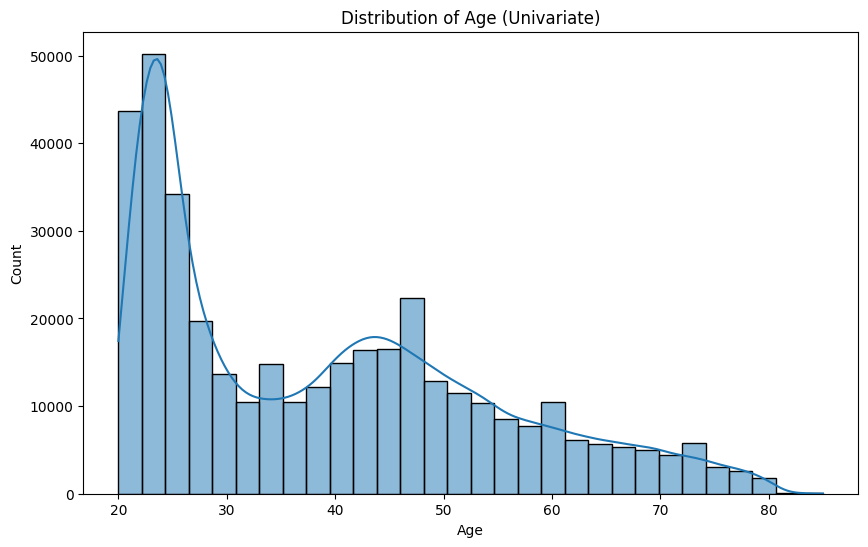

In [23]:
# Chart - 1 visualization code
# Univariate Analysis: Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age (Univariate)')
plt.show()

Chart-2

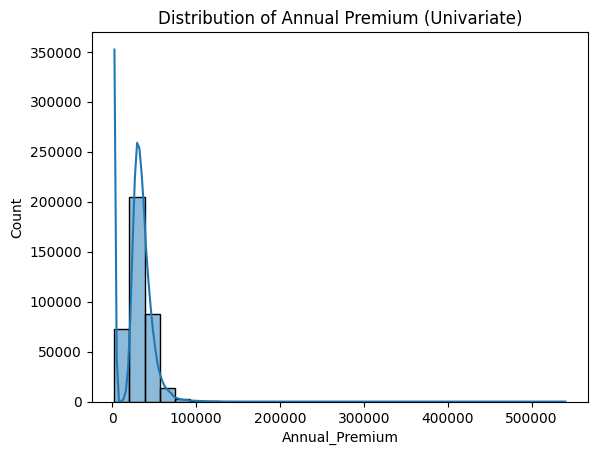

In [10]:
# Chart - 2 visualization code
# Univariate Analysis: Annual Premium
sns.histplot(df['Annual_Premium'], bins=30, kde=True)
plt.title('Distribution of Annual Premium (Univariate)')
plt.show()

Chart-3

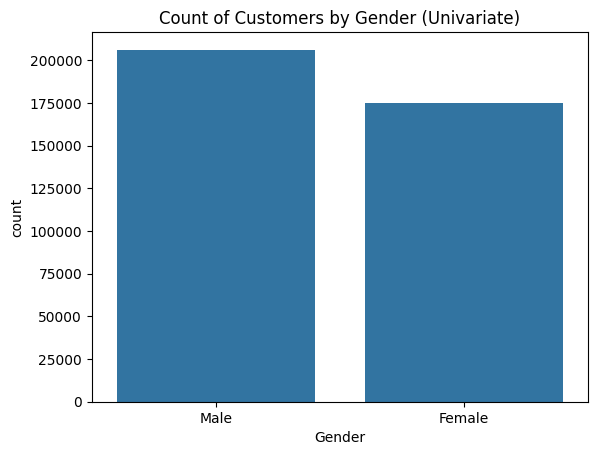

In [11]:
# Chart - 3 visualization code
# Univariate Analysis: Gender
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender (Univariate)')
plt.show()

Chart-4

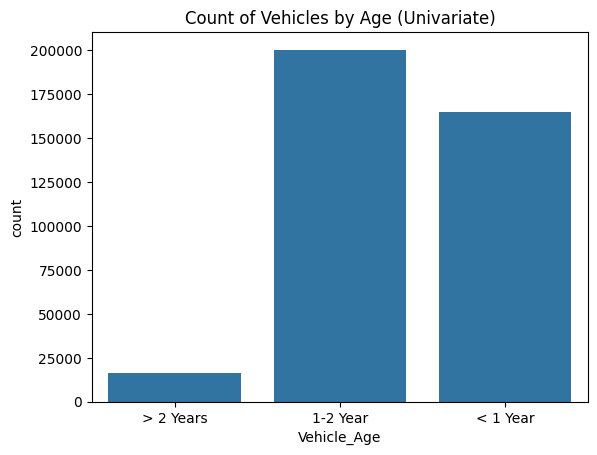

In [12]:
# Chart - 4 visualization code
# Univariate Analysis: Vehicle Age
sns.countplot(x='Vehicle_Age', data=df)
plt.title('Count of Vehicles by Age (Univariate)')
plt.show()
     

Chart-5

In [13]:
# Chart - 5 visualization code
#bivariate analysis: Numerical - Categorical
# Age by Gender
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender (Bivariate)')
plt.show()

Chart-6

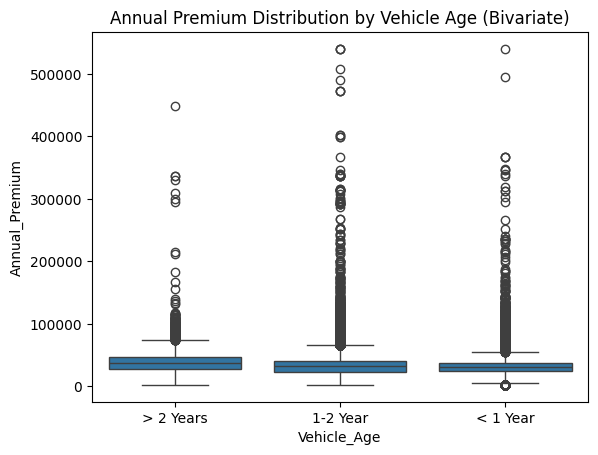

In [14]:
# Chart - 6 visualization code
#bivariate analysis :Numerical - Categorical
# Annual Premium by Vehicle Age
sns.boxplot(x='Vehicle_Age', y='Annual_Premium', data=df)
plt.title('Annual Premium Distribution by Vehicle Age (Bivariate)')
plt.show()

Chart-7

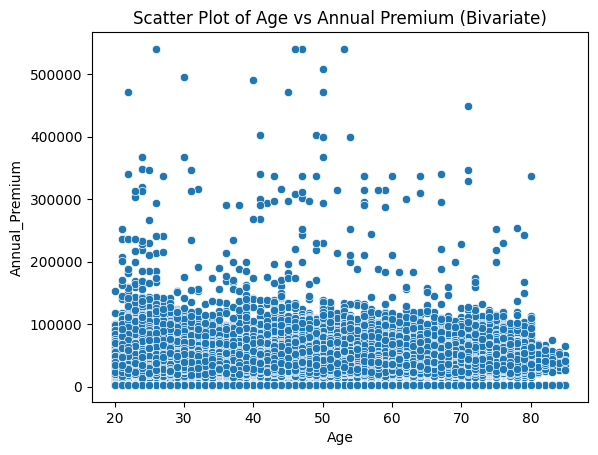

In [15]:
# Chart - 7 visualization code
# Bivariate Analysis: Numerical - Numerical
#Age vs Annual Premium
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Scatter Plot of Age vs Annual Premium (Bivariate)')
plt.show()

Chart-8

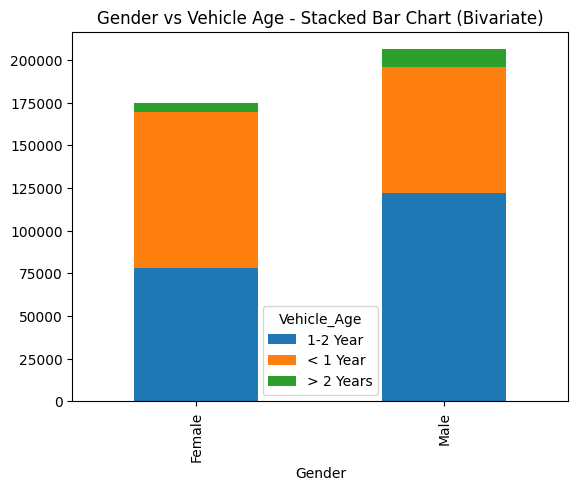

In [16]:
# Chart - 8 visualization code
# Bivariate Analysis: Categorical - Categorical
# Gender vs Vehicle Age (Stacked Bar Chart)
pd.crosstab(df['Gender'], df['Vehicle_Age']).plot(kind='bar', stacked=True)
plt.title('Gender vs Vehicle Age - Stacked Bar Chart (Bivariate)')
plt.show()

Chart-9

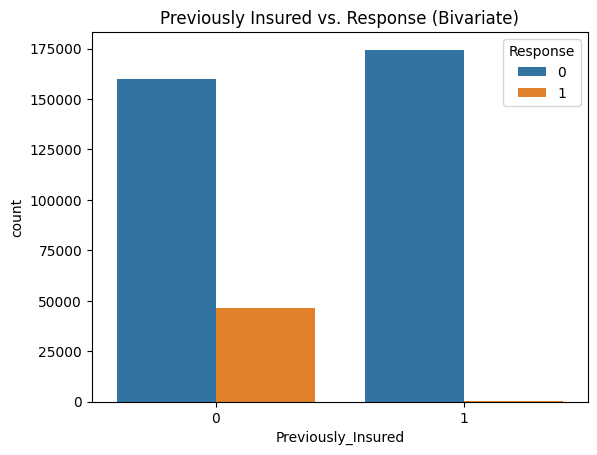

In [17]:
# Chart - 9 visualization code
# Bivariate Analysis: Previously Insured vs. Response
sns.countplot(x='Previously_Insured', hue='Response', data=df)
plt.title('Previously Insured vs. Response (Bivariate)')
plt.show()

Chart-10

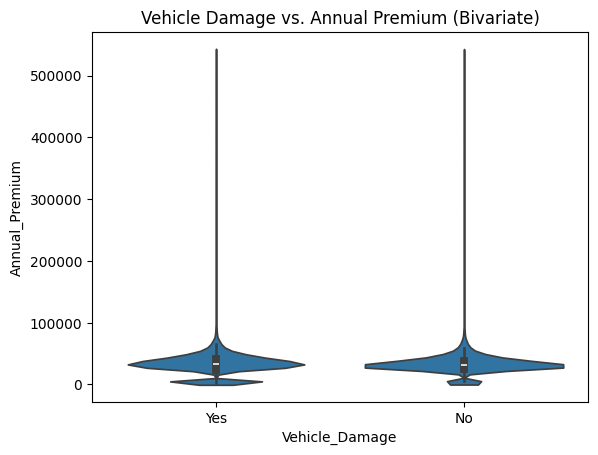

In [18]:
# Chart - 10 visualization code
# Bivariate Analysis: Vehicle Damage vs. Annual Premium
sns.violinplot(x='Vehicle_Damage', y='Annual_Premium', data=df)
plt.title('Vehicle Damage vs. Annual Premium (Bivariate)')
plt.show()

Chart-11

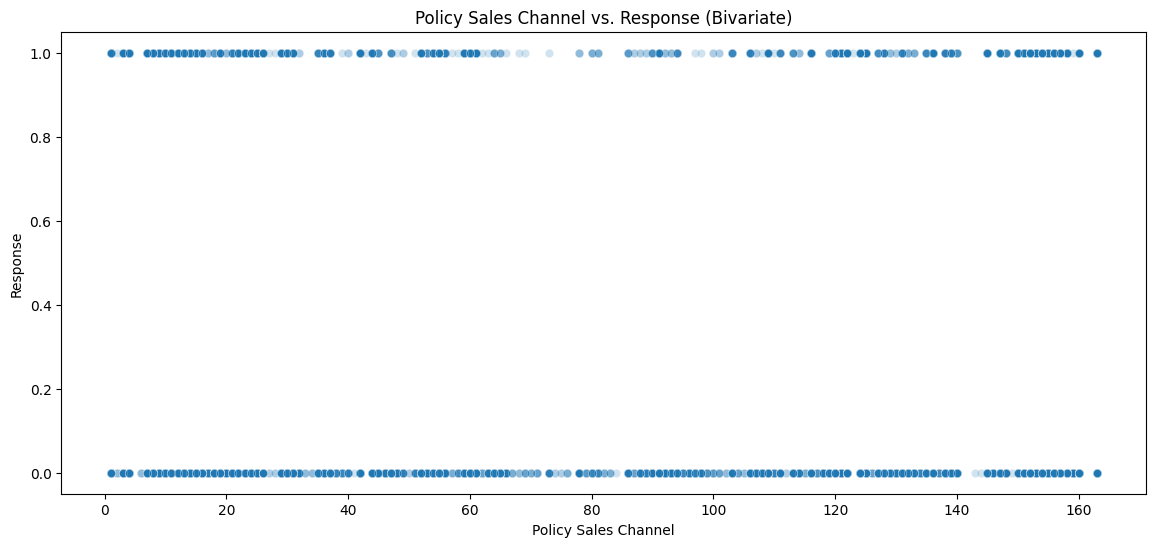

In [19]:
# Chart - 11 visualization code
# Bivariate Analysis: Policy Sales Channel vs. Response (Scatter Plot)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Policy_Sales_Channel', y='Response', data=df, alpha=0.2)
plt.title('Policy Sales Channel vs. Response (Bivariate)')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Response')
plt.show()

Chart-12

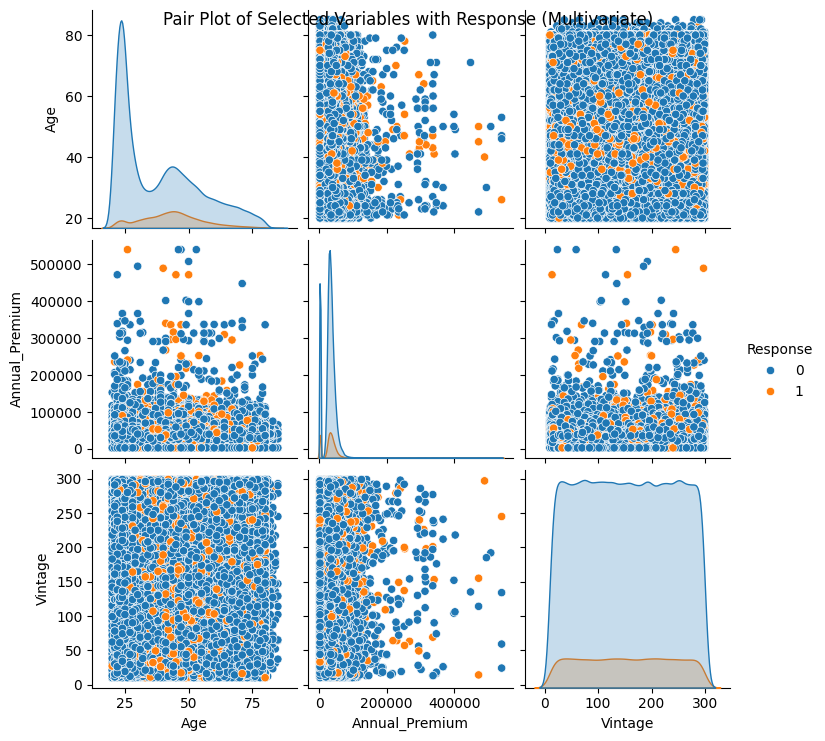

In [20]:
# Chart - 12 visualization code
# Multivariate Analysis: Pair Plot for Selected Variables
selected_vars = ['Age', 'Annual_Premium', 'Vintage', 'Response', 'Vehicle_Damage']
sns.pairplot(df[selected_vars], hue='Response')
plt.suptitle('Pair Plot of Selected Variables with Response (Multivariate)')
plt.show()

Chart-13

C:\Users\hepsi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


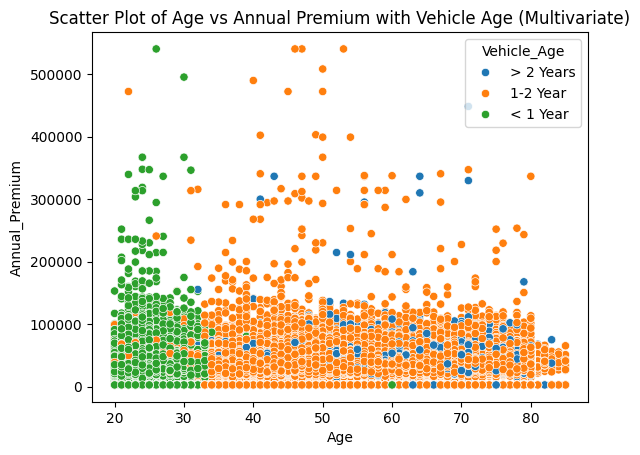

In [21]:
# Chart - 13 visualization code
# Multivariate Analysis: Age vs Annual Premium with Vehicle Age
sns.scatterplot(x='Age', y='Annual_Premium', hue='Vehicle_Age', data=df)
plt.title('Scatter Plot of Age vs Annual Premium with Vehicle Age (Multivariate)')
plt.show()

Chart-14

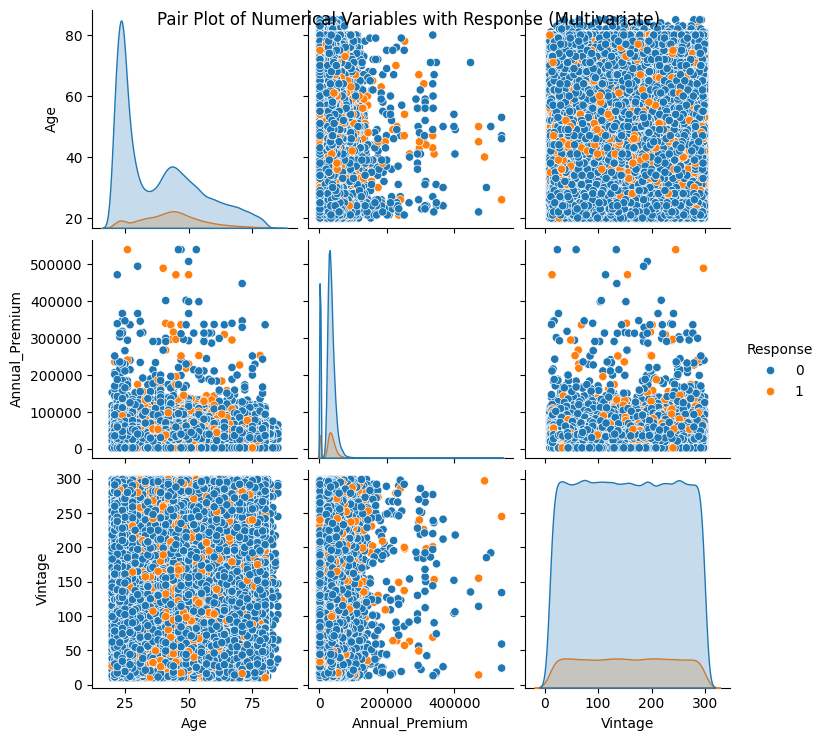

In [22]:
# Pair Plot visualization code
# Pair Plot of Numerical Variables with Response
sns.pairplot(df[['Age', 'Annual_Premium', 'Vintage', 'Response']], hue='Response')
plt.suptitle('Pair Plot of Numerical Variables with Response (Multivariate)')
plt.show()

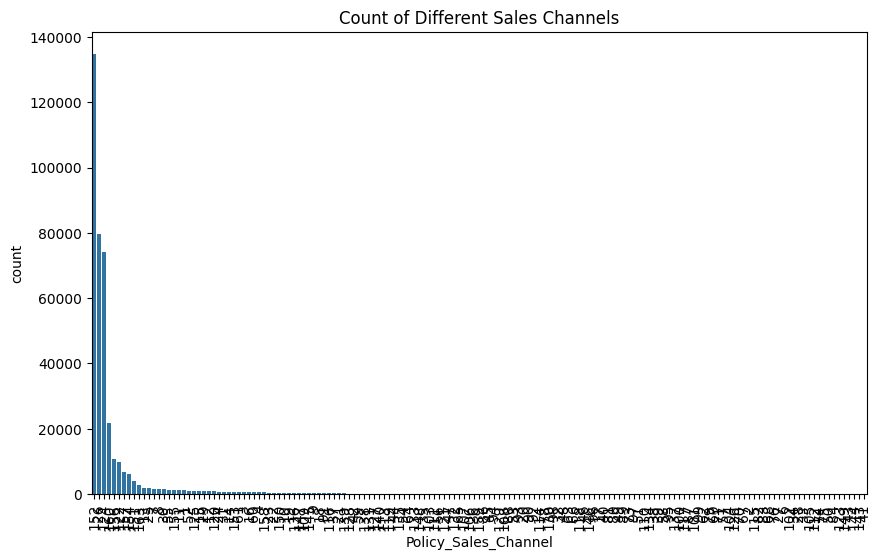

In [4]:
# Count of different Sales Channels
plt.figure(figsize=(10, 6))
sns.countplot(x='Policy_Sales_Channel', data=df, order=df['Policy_Sales_Channel'].value_counts().index)
plt.title('Count of Different Sales Channels')
plt.xticks(rotation=90)
plt.show()


Distribution of Age

 Formulating Assumptions and Obtaining Insights

Do male customers tend to respond faster?

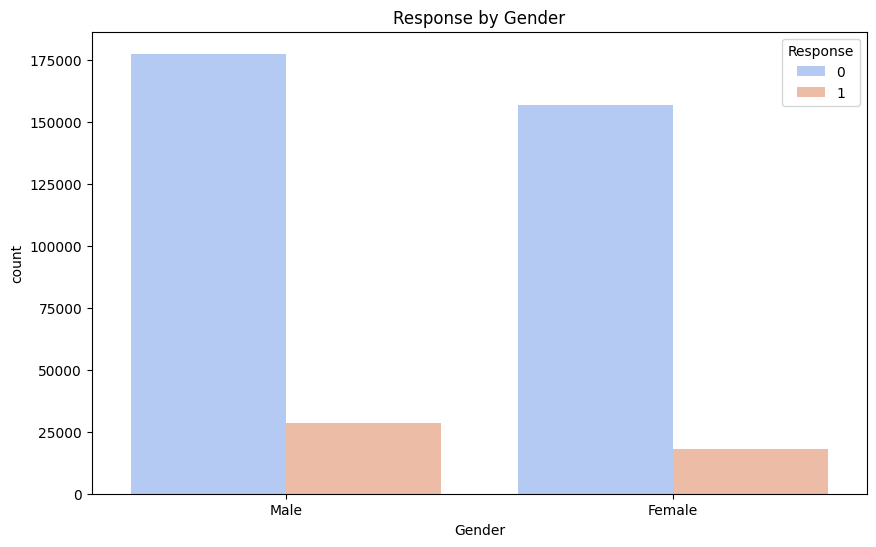

In [6]:
# Response by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Response', data=df, palette='coolwarm')
plt.title('Response by Gender')
plt.show()


Are younger groups less likely to be interested in insurance?

In [7]:
# Response by Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Response', data=df, palette='coolwarm')
plt.title('Response by Age Group')
plt.show()


Data Cleanup

Handle Missing Values

In [27]:
# Visualize missing values
sns.pairplot(df)
plt.show()

# Handle missing values
df.fillna(method='ffill', inplace=True)


C:\Users\hepsi\AppData\Local\Temp\ipykernel_5920\4270710429.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Handle Outliers

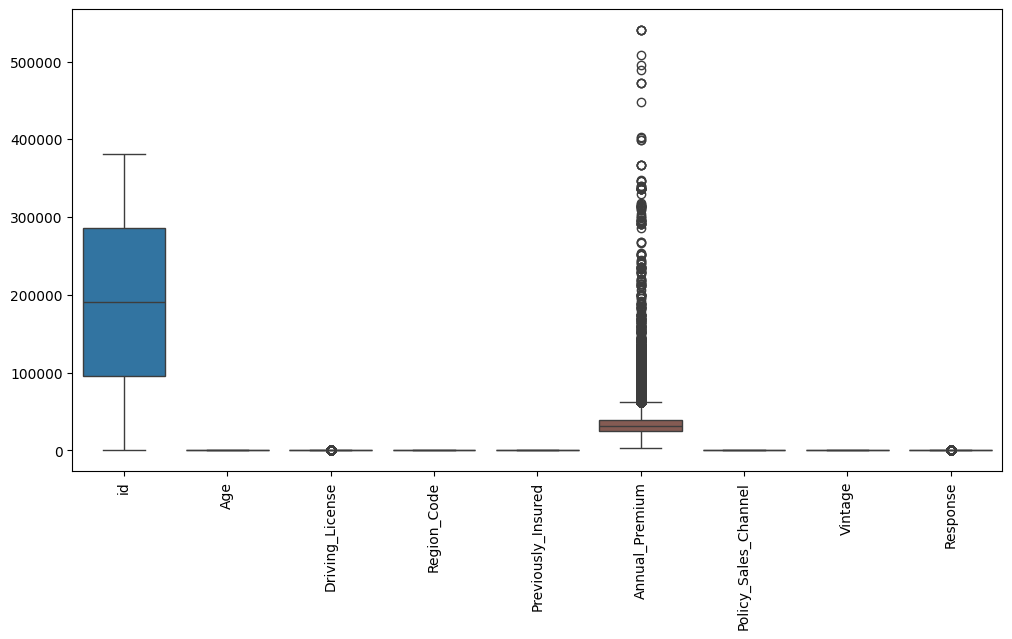

In [14]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


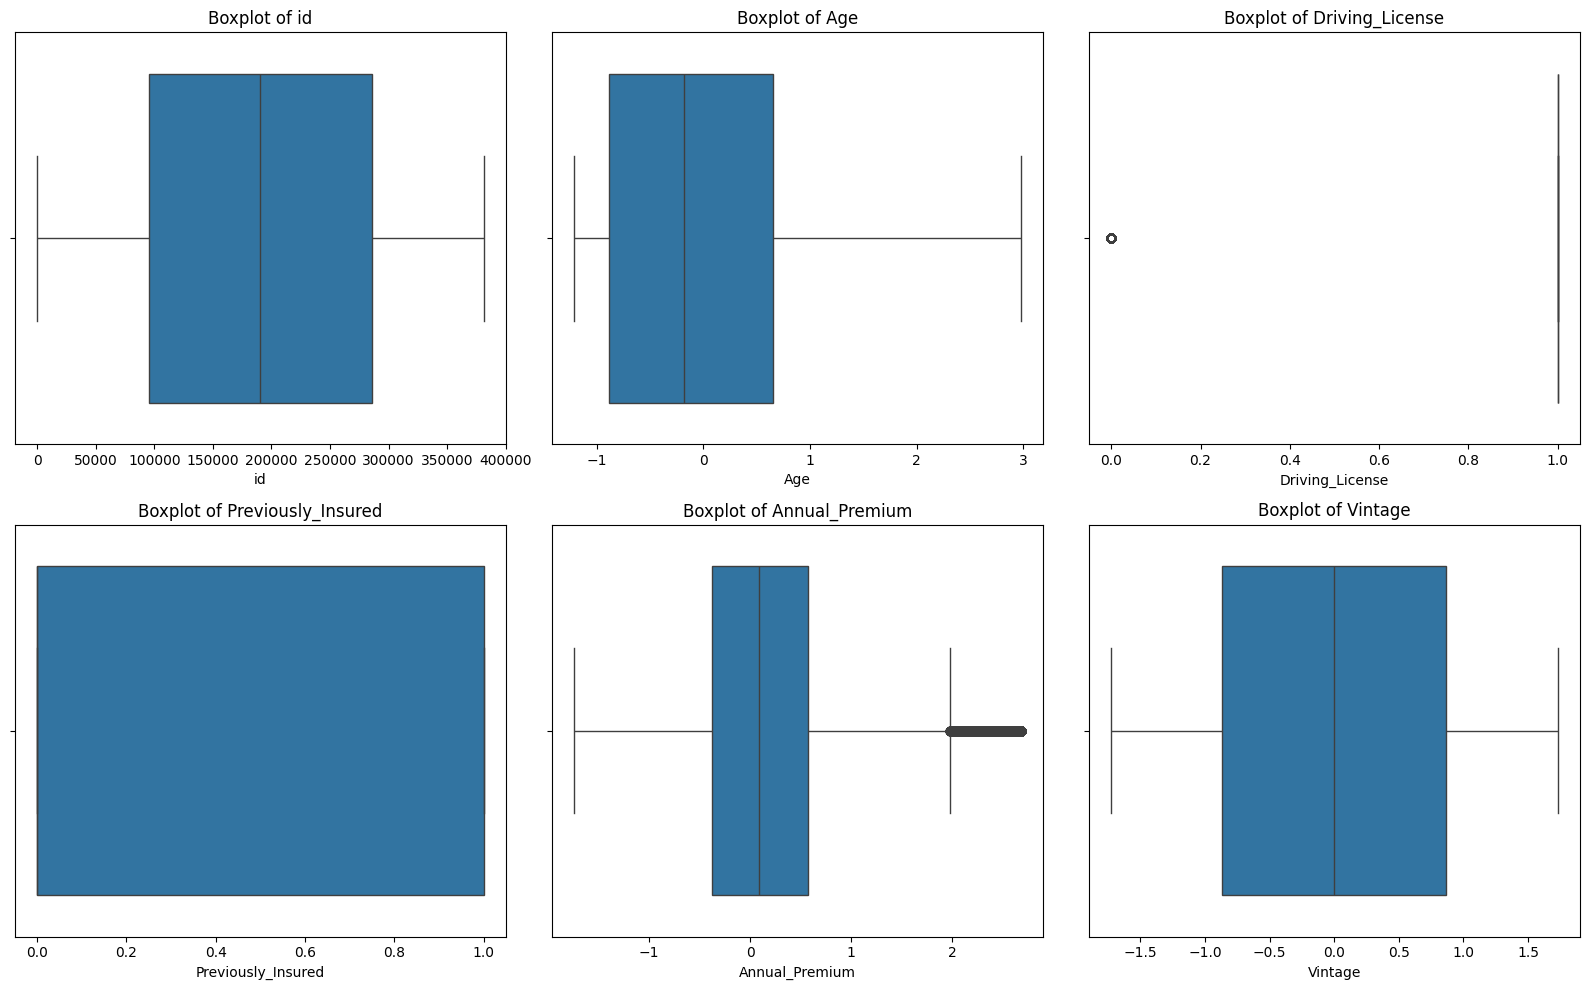

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier visualization
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Visualize outliers using box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [34]:
# Handling Outliers & Outlier treatments
# Visualize Annual Premium before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Annual_Premium', data=df)
plt.title('Annual Premium Distribution (Before Handling Outliers)')
plt.show()

# Function to handle outliers using winsorization
def handle_outliers_winsorization(dataframe, column, lower_limit=0.01, upper_limit=0.99):
    lower_bound = dataframe[column].quantile(lower_limit)
    upper_bound = dataframe[column].quantile(upper_limit)
    dataframe[column] = np.clip(dataframe[column], lower_bound, upper_bound)

# Apply winsorization to 'Annual_Premium'
handle_outliers_winsorization(df, 'Annual_Premium')

# Visualize Annual Premium after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Annual_Premium', data=df)
plt.title('Annual Premium Distribution (After Handling Outliers)')
plt.show()

Feature Engineering

Feature Encoding

In [15]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

# Feature engineering: Creating new features if necessary
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)


Removing Multicollinearity

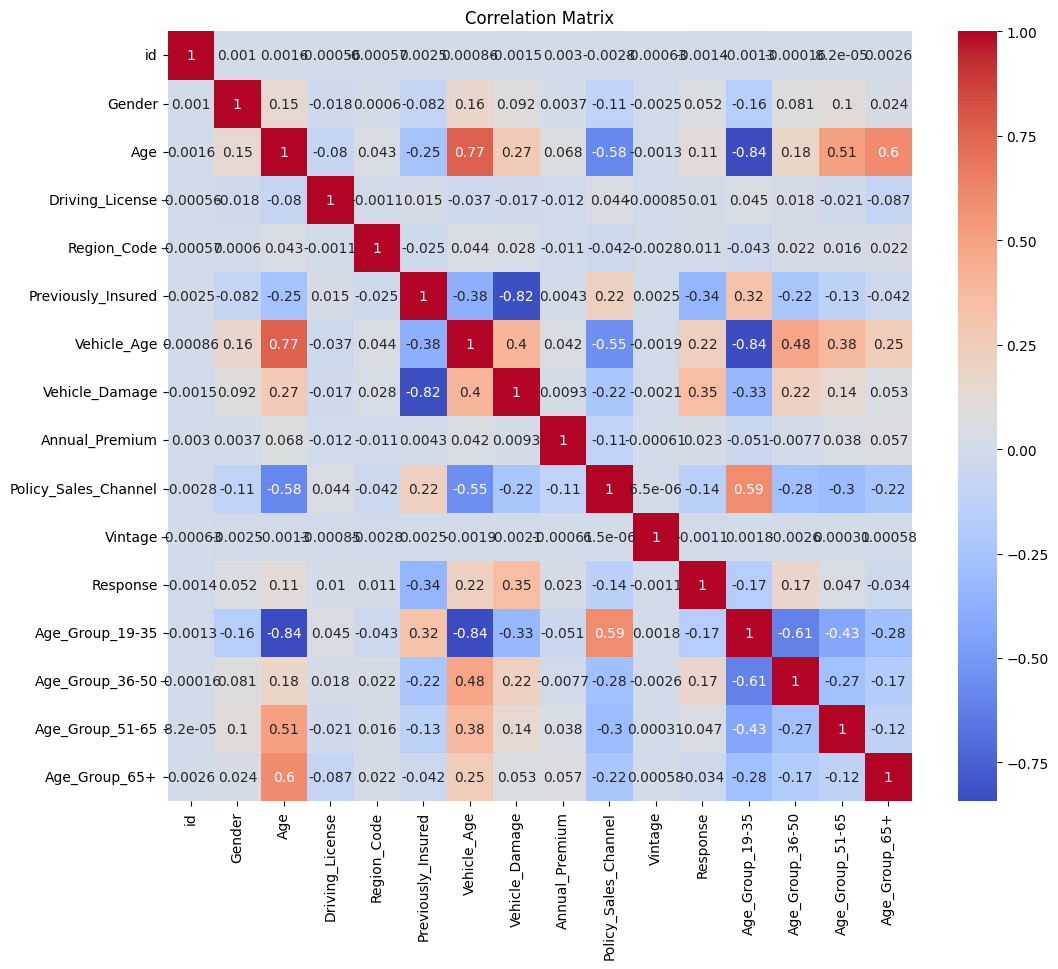

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Hypothesis Testing

Hypothetical Statement - 1

State Your research hypothesis as a null hypothesis and alternate hypothesis. Statement 1: Annual Premium and Response
Null Hypothesis (H0): The mean annual premium for customers who responded positively (1) is equal to the mean annual premium for customers who responded negatively (0).

Alternative Hypothesis (H1): There is a significant difference in the mean annual premium between customers who responded positively and those who responded negatively

Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
# Statement 1: Mean Annual Premium
response_0 = df[df['Response'] == 0]['Annual_Premium']
response_1 = df[df['Response'] == 1]['Annual_Premium']
t_stat, p_value_1 = stats.ttest_ind(response_0, response_1, equal_var=False)

# Display p-value for Statement 1
print(f"Statement 1: p-value = {p_value_1}")

Statement 1: p-value = 1.3649598760164603e-38


Hypothetical Statement - 2

State Your research hypothesis as a null hypothesis and alternate hypothesis. Statement 2: Age and Gender
Null Hypothesis (H0): There is no significant difference in the mean age between male and female customers.

Alternative Hypothesis (H1): There is a significant difference in the mean age between male and female customers.

Perform an appropriate statistical test

In [28]:
# Statement 2: Mean Age by Gender
age_male = df[df['Gender'] == 'Male']['Age']
age_female = df[df['Gender'] == 'Female']['Age']
t_stat, p_value_2 = stats.ttest_ind(age_male, age_female, equal_var=False)

# Display p-value for Statement 2
print(f"Statement 2: p-value = {p_value_2}")

Statement 2: p-value = 0.0


Hypothetical Statement - 3

State Your research hypothesis as a null hypothesis and alternate hypothesis. Statement 3: Previous Insurance and Response
Null Hypothesis (H0): The proportion of customers who have previously insured vehicles and are interested in cross-selling is equal to the proportion of customers who have not previously insured vehicles and are interested in cross-selling.

Alternative Hypothesis (H1): There is a significant difference in the proportion of customers interested in cross-selling based on their previous insurance status.

Perform an appropriate statistical test.

In [29]:
# Statement 3: Proportion of Interest by Previous Insurance Status
contingency_table = pd.crosstab(df['Previously_Insured'], df['Response'])
chi2, p_value_3, _, _ = stats.chi2_contingency(contingency_table)

# Display p-value for Statement 3
print(f"Statement 3: p-value = {p_value_3}")

Statement 3: p-value = 0.0


Handling Missing Values

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


Step 6: Preprocessing

Feature Scaling

In [43]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Annual_Premium', 'Policy_Sales_Channel']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Handling Imbalanced Data

In [44]:
# Handle imbalanced data using SMOTE
X = df.drop('Response', axis=1)
y = df['Response']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


Step 7: Model Implementation

Train-Test Split

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Model Training and Testing

Accuracy: 0.9047765010204921
Precision: 0.9147931345427869
Recall: 0.8931299988062552
F1 Score: 0.903831779229114


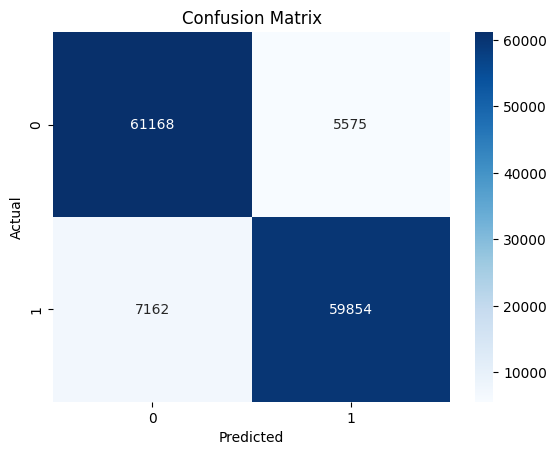

In [46]:
# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)
